# Task - data preparation, basic statistical analysis

You will try to process a very similar dataset as in the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

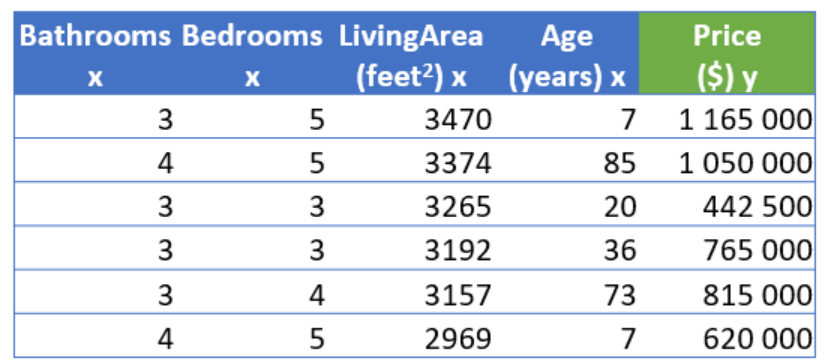

# Task

- Perform a statistical analysis of the data
- Visualize the data
- Select appropriate variables for the linear model
- Standardize the data

## Reading data from CSV file

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')


## Basic data characteristics
- data preview
- display of basic statistics (average, minimum, maximum, ...)
- checking NaN values

In [3]:
print("\n--- Dataset Info ---")
print(data.info())

print("\n--- Descriptive Statistics ---")
print(data.describe())

print("\n--- Null Values (NaN) ---")
print(data.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   bathrooms   100 non-null    int64
 1   bedrooms    100 non-null    int64
 2   livingArea  100 non-null    int64
 3   age         100 non-null    int64
 4   price       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB
None

--- Descriptive Statistics ---
        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.250

## Data distribution
- charts with data distribution
- boxplot charts
- describe what the data is (skewed values, ...)

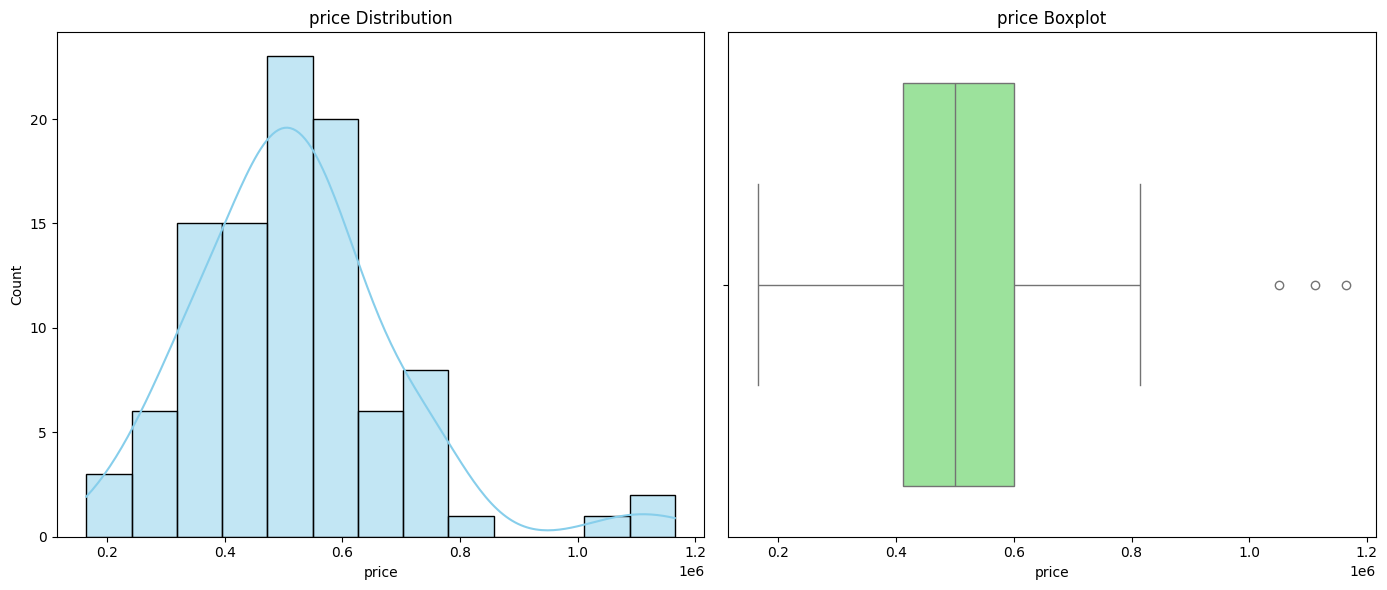

In [4]:
price_col = 'price' 

if price_col in data.columns:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[price_col], kde=True, color='skyblue')
    plt.title(f'{price_col} Distribution')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[price_col], color='lightgreen')
    plt.title(f'{price_col} Boxplot')

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{price_col}' not found for plotting. Please check data.columns.")

## Relationships between data
- pairplot
- correlation table
- Determine which columns are linearly dependent, suitable for explaining price

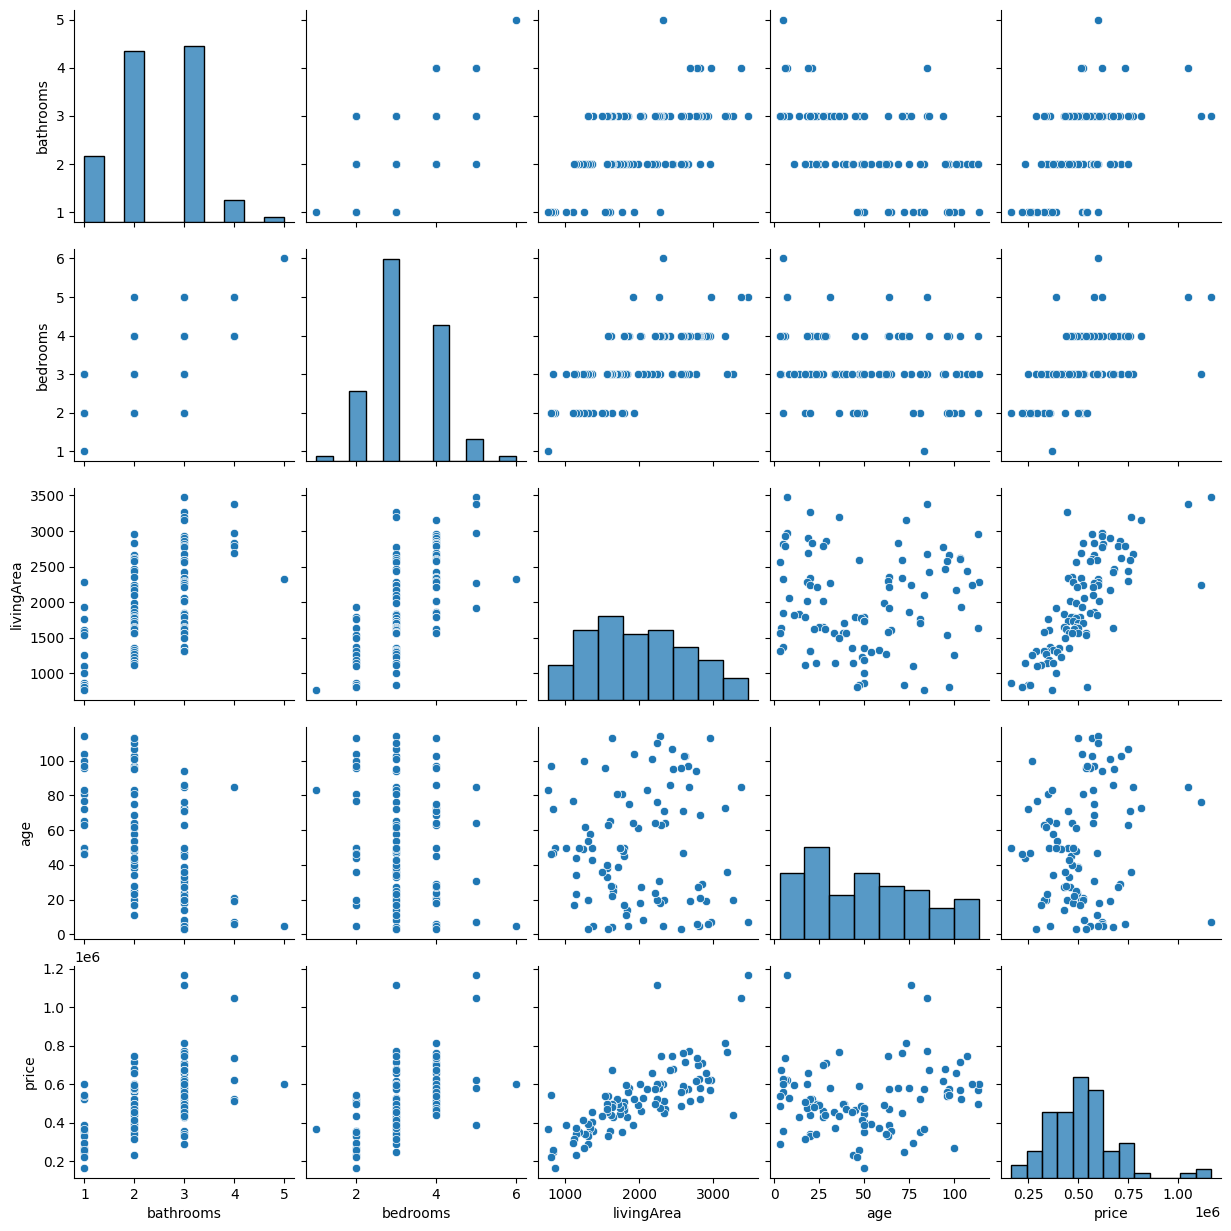

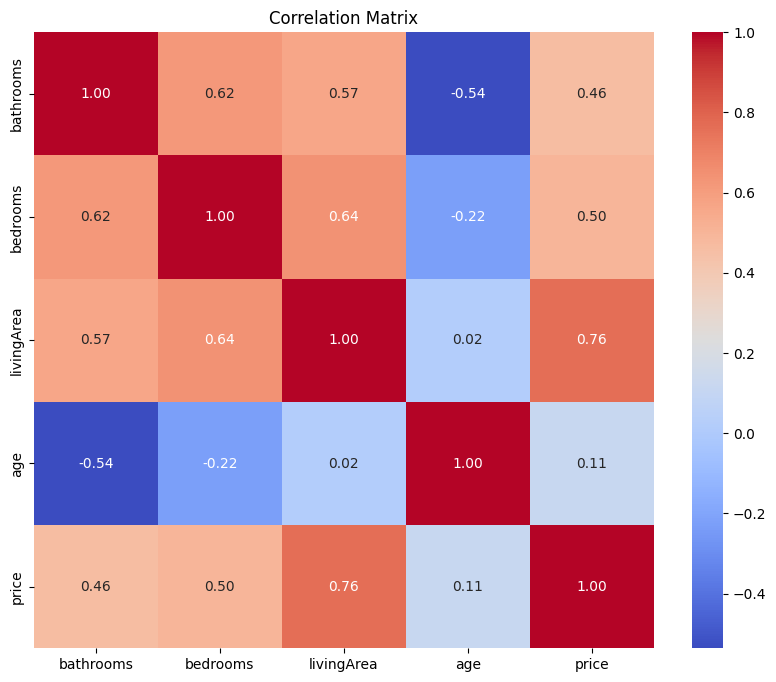

In [5]:
# Pairplot to visualize general relationships
# (Dropping NaNs temporarily to avoid plotting errors)
sns.pairplot(data.dropna())
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation to avoid errors
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data standardization

Each function has a different mean, standard deviation.

Standardization center and scale function.

Reasons:
* to prevent some functions from dominating the model.
* can help machine learning models converge faster
* can facilitate interpretation of machine learning model coefficients

Calculation:
* x_new = (x - mean) / standard_deviation
* mean = sum of (x) / number of (x)
* standard_deviation = sqrt( sum ( (x - mean)^2 ) / count (x))

- perform the standardization of the columns used for the linear regression
- show the distribution of the original and standardised data
*** Translated with www.DeepL.com/Translator (free version) ***



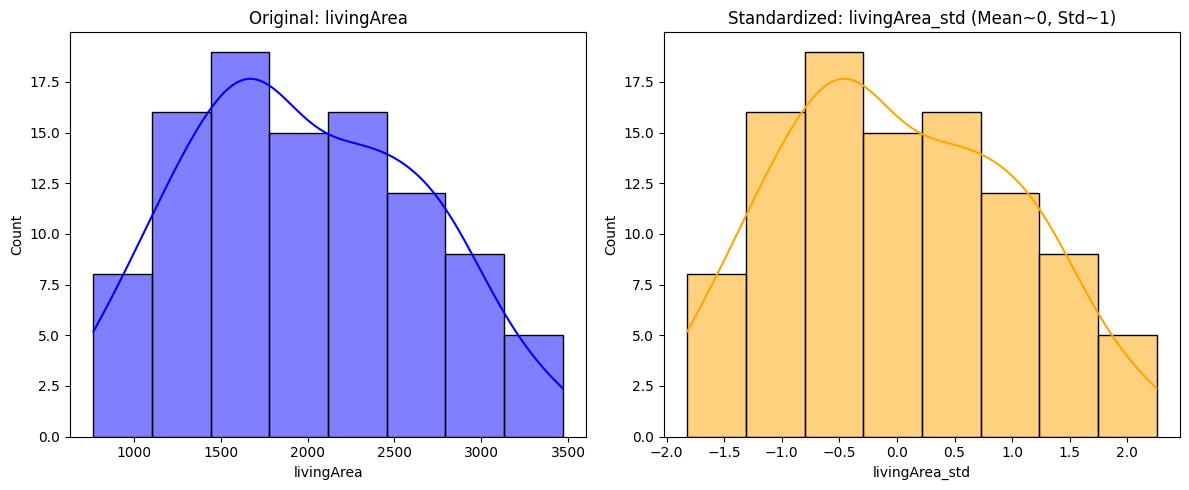


--- Standardization Example ---
   livingArea  livingArea_std
0        3470        2.254148
1        3374        2.109489
2        3265        1.945241
3        3192        1.835240
4        3157        1.782500


In [6]:
col_to_standardize = 'livingArea' 

if col_to_standardize in data.columns:
    # Formula: x_new = (x - mean) / standard_deviation
    mean_val = data[col_to_standardize].mean()
    std_val = data[col_to_standardize].std()

    # Create new standardized column
    std_col_name = f'{col_to_standardize}_std'
    data[std_col_name] = (data[col_to_standardize] - mean_val) / std_val

    # Visualize Original vs Standardized
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[col_to_standardize], kde=True, color='blue')
    plt.title(f'Original: {col_to_standardize}')

    plt.subplot(1, 2, 2)
    sns.histplot(data[std_col_name], kde=True, color='orange')
    plt.title(f'Standardized: {std_col_name} (Mean~0, Std~1)')

    plt.tight_layout()
    plt.show()

    print("\n--- Standardization Example ---")
    print(data[[col_to_standardize, std_col_name]].head())
else:
    print(f"Column '{col_to_standardize}' does not exist in the dataset.")